In [80]:
import lhapdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
Datafile='Data/HERMES_p_2009.csv'
PDFdataset = lhapdf.mkPDF("JAM19PDF_proton_nlo")
#PDFdataset = lhapdf.mkPDF("CT10nnlo")
FF_pion_dataset=["JAM19FF_pion_nlo"]

In [82]:
def TestPlot(filename):
    tempdf=pd.read_csv(filename)
    tempX=np.array(tempdf["x"])
    #tempY=np.array(tempdf["ReE"])
    #tempdY=np.array(tempdf["dReE"])
    #plt.plot(tempX,tempY,'*',color='green')
    #plt.xlabel('Set Number')
    #plt.ylabel('Re E')
    #plt.errorbar(tempX,tempY,tempdY,fmt='o',color='blue')
    return print(tempX)
    
TestPlot(Datafile)

[0.086 0.094 0.097 0.099 0.1   0.101 0.103 0.036 0.056 0.076 0.098 0.133
 0.186 0.275 0.109 0.106 0.1   0.093 0.086 0.08  0.073 0.072 0.081 0.087
 0.093 0.098 0.102 0.106 0.035 0.055 0.076 0.098 0.133 0.185 0.273 0.111
 0.103 0.095 0.087 0.08  0.073 0.07  0.084 0.091 0.094 0.096 0.097 0.096
 0.098 0.035 0.055 0.076 0.098 0.133 0.186 0.275 0.106 0.102 0.096 0.089
 0.083 0.079 0.072 0.083 0.092 0.097 0.099 0.102 0.103 0.106 0.036 0.056
 0.076 0.099 0.134 0.186 0.274 0.111 0.107 0.103 0.096 0.089 0.081 0.072
 0.081 0.086 0.091 0.091 0.091 0.092 0.094 0.035 0.055 0.076 0.098 0.133
 0.186 0.275 0.102 0.098 0.094 0.086 0.081 0.076 0.07  0.093 0.102 0.105
 0.106 0.107 0.111 0.11  0.036 0.056 0.076 0.099 0.133 0.186 0.276 0.119
 0.116 0.112 0.105 0.094 0.083 0.074]


In [83]:
def dataslice(filename,Had,Var):
    tempdf=pd.read_csv(filename)
    temp_slice=tempdf[(tempdf["hadron"]==Had)&(tempdf["1D_dependence"]==Var)]
    tempQ2=np.array(temp_slice["Q2"])
    tempX=np.array(temp_slice["x"])
    tempZ=np.array(temp_slice["z"])
    tempPHT=np.array(temp_slice["phT"])
    tempSiv=np.array(temp_slice["Siv"])
    temperrSiv=np.array(temp_slice["tot_err"])
    return tempQ2,tempX,tempZ,tempPHT,tempSiv,temperrSiv
        

print(dataslice(Datafile,"pi+","z")[0])
print(len(dataslice(Datafile,"pi+","z")))

[2.423 2.428 2.425 2.418 2.411 2.4   2.385]
6


In [99]:
def ks2Avg(m1,kperp2Avg):
    test_ks2Avg=((m1**2)*kperp2Avg)/((m1**2)+kperp2Avg)
    return test_ks2Avg

def A0(z,pht,m1,kperp2Avg,pperp2Avg,eCharg):
    tempA0part1=(((z**2)*kperp2Avg+pperp2Avg)*((ks2Avg(m1,kperp2Avg))**2))/((((z**2)*(ks2Avg(m1,kperp2Avg))+pperp2Avg)**2)*kperp2Avg)
    tempA0part21=(pht**2)*(z**2)*(ks2Avg(m1,kperp2Avg) - kperp2Avg)
    tempA0part22=((z**2)*(ks2Avg(m1,kperp2Avg))+pperp2Avg)*((z**2)*kperp2Avg+pperp2Avg)
    tempA0part2=np.exp(-tempA0part21/tempA0part22)
    tempA0part3=(np.sqrt(2*eCharg))*z*pht/m1
    tempA0=tempA0part1*tempA0part2*tempA0part3
    return tempA0

#print(A0(0.2,0.3,1,2.5,1.5,1/137))

def NNu(x,Nu,alphau,betau):
    tempNNu = Nu*(x**alphau)*((1-x)**(betau))*((alphau+betau)**(alphau+betau))/((alphau**alphau)*(betau**betau))
    return tempNNu

def NNubar(x,Nubar,alphaubar=0,betaubar=0):
    #tempNNubar = Nubar*(x**alphaubar)*((1-x)**(betaubar))*((alphaubar+betaubar)**(alphaubar+betaubar))/((alphaubar**alphaubar)*(betaubar**betaubar))
    tempNNubar = Nubar
    return tempNNubar

def NNd(x,Nd,alphad,betad):
    tempNNd = Nd*(x**alphad)*((1-x)**(betad))*((alphad+betad)**(alphad+betad))/((alphad**alphad)*(betad**betad))
    return tempNNd

def NNdbar(x,Ndbar,alphadbar=0,betadbar=0):
    #tempNNdbar = Ndbar*(x**alphadbar)*((1-x)**(betadbar))*((alphadbar+betadbar)**(alphadbar+betadbar))/((alphadbar**alphadbar)*(betadbar**betadbar))
    tempNNdbar = Ndbar
    return tempNNdbar

def NNs(x,Ns,alphas,betas):
    #tempNNu = Ns*(x**alphas)*((1-x)**(betas))*((alphas+betas)**(alphas+betas))/((alphas**alphas)*(betas**betas))
    tempNNs = 0
    return tempNNs

def NNsbar(x,Nsbar,alphasbar,betasbar):
    #tempNNsbar = Nsbar*(x**alphasbar)*((1-x)**(betasbar))*((alphasbar+betasbar)**(alphasbar+betasbar))/((alphasbar**alphasbar)*(betasbar**betasbar))
    tempNNsbar = 0
    return tempNNsbar


def xFxQ2(dataset,flavor,x,QQ):
    temp_parton_dist_x=(dataset.xfxQ2(flavor, x, QQ))
    return temp_parton_dist_x

def zFzQ(dataset,flavor,zz,QQ):
    # Here "0" represents the central values from the girds
    temp_zD1=lhapdf.mkPDF(dataset[0], 0)
    zD1_vec=(temp_zD1.xfxQ2(flavor,zz,QQ))
    return zD1_vec


In [100]:
def ASivPiP(x,z,pht,m1,kperp2Avg,pperpAvg,eCharg,eu,edbar,Nu,alphau,betau,Ndbar,QQ):
    Ucontribution1 = NNu(x,Nu,alphau,betau)*(eu**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_pion_dataset,2,z,QQ)
    dbarcontribution1 = NNdbar(x,Ndbar)*(edbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_pion_dataset,-1,z,QQ)
    Ucontribution2 = (eu**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_pion_dataset,2,z,QQ)
    dbarcontribution2 = (edbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_pion_dataset,-1,z,QQ)
    tempNumerator = Ucontribution1 + dbarcontribution1
    tempDenominator = Ucontribution2 + dbarcontribution2
    tempASivPiP = A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg)*tempNumerator/tempDenominator
    return tempASivPiP

M1=np.sqrt(0.8)
Kp2A=0.57
Pp2A=0.12
ee=1/137
eU=2/3
eDbar=1/3
AlphaU=1.0
BetaU=6.6
NU=0.18
NDbar=-0.06


ASivPiP(0.086,0.234,0.346,M1,Kp2A,Pp2A,ee,eU,eDbar,NU,AlphaU,BetaU,NDbar,2.423)

0.002754462098810499

In [101]:
#M1=np.sqrt(0.8)
#Kp2A=0.57
#Pp2A=0.12
#ee=1/137
#eU=2/3
#eDbar=1/3
#AlphaU=1.0
#BetaU=6.6
#NU=0.18
#NDbar=-0.06

M1=1
Kp2A=0.57
Pp2A=0.12
ee=1/137
eU=2/3
eDbar=1/3
AlphaU=1
BetaU=1
NU=1
NDbar=1

#dataslice(Datafile,"pi+","z")

def CalcSiversPiP(datfile,hadron,dependence,m1,kperp2Avg,pperpAvg,eCharg,eu,edbar,Nu,alphau,betau,Ndbar):
    data_points=len(dataslice(datfile,hadron,dependence)[0])
    temp_kinematics=np.array(dataslice(datfile,hadron,dependence))
    temp_Siv=[]
    for i in range(0,data_points):
        temp_Siv.append(ASivPiP(temp_kinematics[1][i],temp_kinematics[2][i],temp_kinematics[3][i],M1,Kp2A,Pp2A,ee,eU,eDbar,NU,AlphaU,BetaU,NDbar,temp_kinematics[0][i]))        
    return temp_Siv


print(CalcSiversPiP(Datafile,"pi+","x",M1,Kp2A,Pp2A,ee,eU,eDbar,NU,AlphaU,BetaU,NDbar))

[0.00868896393077473, 0.00883441628409108, 0.009633213994764012, 0.011022828952177453, 0.01325435652602485, 0.016638573816476387, 0.021837979867059727]


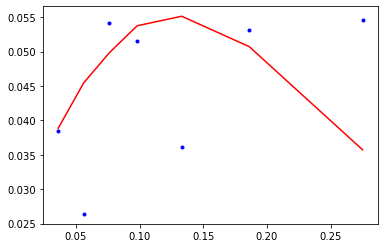

In [113]:
M1=np.sqrt(0.8)
Kp2A=0.57
Pp2A=0.12
ee=1
eU=2/3
eDbar=1/3
AlphaU=1.0
BetaU=6.6
NU=0.18
NDbar=-0.06



def PlotSiversPiP(datfile,hadron,dependence,m1,kperp2Avg,pperpAvg,eCharg,eu,edbar,Nu,alphau,betau,Ndbar):
    data_points=len(dataslice(datfile,hadron,dependence)[0])
    temp_kinematics=np.array(dataslice(datfile,hadron,dependence))
    temp_Siv=[]
    for i in range(0,data_points):
        temp_Siv.append(1*ASivPiP(temp_kinematics[1][i],temp_kinematics[2][i],temp_kinematics[3][i],M1,Kp2A,Pp2A,ee,eU,eDbar,NU,AlphaU,BetaU,NDbar,temp_kinematics[0][i]))        
    plt.plot(temp_kinematics[1],temp_Siv,'red')
    plt.plot(temp_kinematics[1],temp_kinematics[4],'.b')
    
PlotSiversPiP(Datafile,"pi+","x",M1,Kp2A,Pp2A,ee,eU,eDbar,NU,AlphaU,BetaU,NDbar)    

#print(A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg))
print(A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg))

In [95]:
A0(1,1,1,1,1,1/137)

0.04757906170651974